In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

pd.set_option('display.max_columns', 50)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

中心极限定理：对于均值为mu，标准差为theta的总体，其抽样分布的均值将服从均值为mu，标准差为delta^2/mu的正态分布

In [5]:
df = pd.read_stata('CLDS2014-individual-170707-STATA-release.dta',convert_categoricals=False)
def fre(series):
    tabulate=pd.concat([series.value_counts(),
           series.value_counts()/len(series)],axis=1)
    tabulate.columns=['freq.','per.']
    tabulate.loc['total']=tabulate.apply(lambda x:x.sum())
    return tabulate
df.head()

,IID2014,IID2014cvid,FID2014,CID2014,PROVINCE,CITY,COUNTY,IID2012,FID2012,rtype,utype,relation1,gender,birthmonth,birthyear,marriage,hkaddress_pro,hkaddress_city,hkaddress1_county,ethnic,ethnicoth,work,work_r,work2013,I1_tsstart,...,I10_6,I10_7,I10_8,I10_8_oth,I10_9,I10_10,I10_10_oth,I10_11,I10_12s1,I10_12s2,I10_12s3,I10_12s4,I10_12s5,I10_13,strata,nncode,fpc_p,ncode,scode,countytype,rot,wfd,wpr,wpp,poststrata_p
0,1.101020e+15,1.101020e+15,1.101020e+15,110102.0,110000.0,110100.0,110106.0,1.101020e+11,110102042.0,1,2,1,2.0,9.0,1957.0,2.0,110000.0,110100.0,110114.0,1.0,,1.0,1.0,2.0,2014-07-21 19:21:02,...,4.0,3.0,1.0,,1.0,3.0,,7.0,NaN,2.0,NaN,NaN,NaN,3.0,1.0,125.0,398932224.0,1110104.0,110102.0,1.0,1.0,13239.740234,13561.454102,3993.920898,105.0
1,1.101020e+15,1.101020e+15,1.101020e+15,110102.0,110000.0,110100.0,110106.0,NaN,NaN,0,2,2,2.0,8.0,1951.0,2.0,110000.0,110100.0,110106.0,1.0,,1.0,1.0,2.0,2014-07-21 17:17:46,...,3.0,3.0,1.0,,1.0,3.0,,7.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,125.0,398932224.0,1110104.0,110102.0,1.0,1.0,13239.740234,23831.533203,9036.729492,110.0
2,1.101030e+15,1.101030e+15,1.101030e+15,110103.0,110000.0,110100.0,110106.0,NaN,NaN,0,2,2,1.0,3.0,1959.0,2.0,110000.0,110100.0,110106.0,1.0,,1.0,1.0,1.0,2014-08-09 19:01:52,...,4.0,4.0,1.0,,1.0,2.0,,8.0,NaN,2.0,NaN,NaN,NaN,2.0,1.0,125.0,398932224.0,1110104.0,110103.0,1.0,1.0,13239.740234,23831.533203,8644.112305,49.0
3,1.101030e+15,1.101030e+15,1.101030e+15,110103.0,110000.0,110100.0,110106.0,NaN,NaN,0,2,1,2.0,99999.0,1983.0,1.0,130000.0,130100.0,130124.0,1.0,,1.0,1.0,1.0,2014-08-06 19:42:03,...,3.0,3.0,1.0,,1.0,1.0,,7.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,125.0,398932224.0,1110104.0,110103.0,1.0,1.0,13239.740234,15829.493164,6851.640137,77.0
4,1.101010e+15,1.101010e+15,1.101010e+15,110101.0,110000.0,110100.0,110106.0,NaN,NaN,0,2,21,2.0,6.0,1969.0,2.0,110000.0,110100.0,110106.0,1.0,,1.0,1.0,1.0,2014-07-25 15:10:08,...,4.0,3.0,1.0,,2.0,1.0,,4.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,125.0,398932224.0,1110104.0,110101.0,1.0,2.0,13239.742188,17274.710938,13710.202148,93.0


In [3]:
def fre(series):
    tabulate=pd.concat([series.value_counts(),
           series.value_counts()/len(series)],axis=1)
    tabulate.columns=['freq.','per.']
    tabulate.loc['total']=tabulate.apply(lambda x:x.sum())
    return tabulate

In [4]:
def sampling_distribution(data, sample_size=20, bins=40):
    #抽样分布模拟，输出均值、标准差以及直方图、ECDF图
    # 随机抽样
    sampling = [np.mean(np.random.choice(data, size=sample_size, replace=False)) for _ in range(1000)]  
 
    # 输出总体和抽样分布的均值、标准差
    mu = np.mean(data)
    se = np.std(data) / np.sqrt(sample_size)
    print('mean of sample means: %.2f' % np.mean(sampling))
    print('population means: %.2f' % mu)
    print('Standard deviation of sample means: %.2f' % np.std(sampling))
    print('Standard Error: %.2f' % se)
 
    # 绘制抽样分布的直方图、ECDF图
    fig = plt.figure(figsize=(16,5))
    p1 = fig.add_subplot(121)
    plt.hist(sampling, bins=bins, rwidth=0.9)
    plt.xlabel('sampling means')
    plt.ylabel('counts')
    p2 = fig.add_subplot(122)
    plot_ecdf(sampling, xlabel='sampling means', label='sampling ')
    sample = np.random.normal(mu, se, size=10000)
    plot_ecdf(sample, xlabel='sampling means', label='normal distribution')
    plt.show()
    return
    
def ecdf(data):
    #计算ECDF
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)
 
def plot_ecdf(data, xlabel=None , ylabel='ECDF', label=None):
    #绘制ECDF图
    x, y = ecdf(data)
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none', label=label)
    _ = plt.legend(markerscale=4)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)

count    2.368000e+03
mean     3.734783e+04
std      7.412153e+04
min      0.000000e+00
25%      4.000000e+03
50%      2.000000e+04
75%      4.800000e+04
max      1.500000e+06
Name: a8a, dtype: float64
mean of sample means: 37585.91
population means: 37347.83
Standard deviation of sample means: 17337.16
Standard Error: 16570.58


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


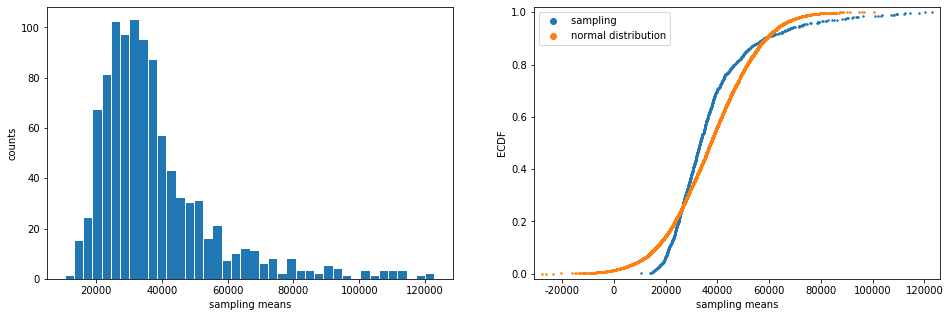

In [6]:
#模拟中心极限定理
income = pd.to_numeric(df['a8a'].replace(['不知道','不适用'],np.nan),errors='coerce')
print(income.describe())
sampling_distribution(income.dropna())

正态分布：钟形的对称曲线，其均值、众数与标准差都位于概率分布曲线的最高点上。形状由均值与标准差决定

In [ ]:
def ci(data,confidence=0.95):
    sample_mean = np.mean(data,0)
    sample_std = np.std(data,ddof=1)
    sample_size = len(data)
    conf_intveral = stats.norm.interval(confidence, loc=sample_mean, scale=sample_std)
    ls = [sample_size, sample_mean, sample_std, conf_intveral]
    ci_produce = pd.Series(ls,index=['obs.','mean','std','ci'])
    return ci_produce
df['age'] = 2010 - pd.to_numeric(df['y_birth'].replace([9997,9998,9999],np.nan).dropna(),errors='coerce')
height = pd.to_numeric(df['height'], errors='coerce')
height.describe()
ci(height)

In [ ]:
def ciplot(data):
    sample_mean = np.mean(data,0)
    sample_std = np.std(data,ddof=1)
    sample_size = len(data)
    low_CI_bound, high_CI_bound = stats.norm.interval(0.95, loc=sample_mean, scale=sample_std)
    x = np.linspace(min(data),max(data), num=sample_size)
    plt.plot(sample_mean, linewidth=3., label='estimated value')
    #plt.plot(Mu, color='r', label='grand truth')
    plt.fill_between(x, low_CI_bound, high_CI_bound, alpha=0.5,
                label='confidence interval')
    plt.legend()
    plt.title('Confidence interval')
    plt.show()
ciplot(df['age'])

In [ ]:
# 正态分布下的置信区间
def norm_conf (data,confidence=0.95):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
    sample_mean = np.mean(data)
    sample_std = np.std(data,ddof=1)
    sample_size = len(data)
    conf_intveral = stats.norm.interval(confidence, loc=sample_mean, scale=sample_std)
    return conf_intveral


In [ ]:
# T分布下的置信区间
def ttest_conf (data,confidence=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data,ddof=1)
    sample_size = len(data)
    conf_intveral = stats.t.interval(confidence,df = (sample_size-1) , loc=sample_mean, scale=sample_std)
    return conf_intveral

In [ ]:
#计算不同政治面貌收入的差异
gb = pd.concat([df['polevel'],income],axis=1).groupby('polevel')
ci(gb.get_group(name='群众'))